#<font color='red'> This looks familiar...

<font color='red'> This activity is a **direct copy** of Activity 3. We want you to repeat this process, but now examining the sounds of **different instruments** (brass and woodwind, woodwind and string, string and xylophone, etc.) playing the same note. I've repeated all the instructions below, but if you'd rather work based off your own notes on Activity 3, you can do that, too!

<font color='red'> At the end of the activity, discuss what it means for two different instruments to play the same note but "sound differently."

# <font color='red'>Student Learning Outcomes

<p><font color='red'>
To complete this activity, you must demonstrate that you can... <p>

<font color='red'>
1. Demonstrate an understanding of the nature of sound, including overtone series/harmonic series.<p>

<font color='red'>
2. Determine the ratio of frequencies for various intervals.<p>

<font color='red'>
3. Be able to decompose multiple sounds into their component frequencies for various instrument tone qualities and study its connections to timbre.<p>

<font color='red'>
4. Describe the acoustics of various instruments.<p>


# <font color='red'>Textbook Chapters

<font color='red'><p>
Chapters 7-14, *The Science of Sound* by Rossing, Moore, & Wheeler</font>

<font color='red'><p> Chapters 4, 9, 10-14, *The Physics of Sound* by Berg & Stork</font>

# <font color='red'>Make a copy!

<font color='red'><p>
You and your lab partner(s) each need your own copy of this Jupyter notebook. Click on File  →  Save a copy in Drive in the menu above to save your own copy.

# <font color='red'>Install ThinkDSP
<font color='red'> This activity requires the ThinkDSP (**D**igital **S**ignal **P**rocessing) library, which is an incredibly useful set of tools. Run the code cell below to download the ThinkDSP library. It's possible that you'll get an error message. If this happens, click on `Runtime` above, then `Disconnect and delete runtime`. This is just a glitch of running code on-line. You didn't do anything wrong.

In [ ]:
!git clone https://github.com/AllenDowney/ThinkDSP.git

Cloning into 'ThinkDSP'...
remote: Enumerating objects: 2469, done.
remote: Total 2469 (delta 0), reused 0 (delta 0), pack-reused 2469
Receiving objects: 100% (2469/2469), 208.82 MiB | 27.22 MiB/s, done.
Resolving deltas: 100% (1353/1353), done.
Checking out files: 100% (302/302), done.


#<font color='red'>Record Some Notes

<font color='red'>Your data for this lab consists of recording notes on two different instruments. You'll want to make **several separate recordings**. Each recording should have **two instruments** playing **the same note**. Get recordings for **different types of instruments** (brass and woodwind, woodwind and string, brass and string, etc.). If you'd rather sing, try singing the same note with different vowels! (Or, if you'd like to exchange recordings from Activity 3 with a different group, you can! Just as long as the recordings have the same note.)

<font color='red'>To help you manage your data, save each file with a name that indicates the instrument, the note, and your last names.

<font color='red'>If you need to, convert the recording files to `.wav` format. (You can try other formats, but I don't know whether they will work!) [Here's a site](https://audio.online-convert.com/convert-to-wav) where you can do this.

<font color='red'>Upload your `.wav` files to Google Drive. You can upload them to [this folder](https://drive.google.com/drive/folders/1WxHNUSk6BmLN1DIFnhOfHUWLhFt5Hnfe?usp=sharing) if you'd like.

<font color='red'>Open sharing for each of your `.wav` files and turn on "Anyone on the internet with the link can view." (If you saved them to the folder above, then this sharing is automatically set!)

<font color='red'>Now copy-paste the **file ID** for each of your `.wav` files. The file ID is found in the file's sharing URL, minus the `https://drive.google.com/file/d/` and `/view?usp=sharing`. Paste each file ID after a copy of the `! gdown --id ` command in the code cell below. The example code below uses two example files, which you can delete once you get the idea. Copy-paste and add your own file IDs if you have more than 2 files.

In [ ]:
# Download the .wav files.
! gdown --id 1KzZ264gqo9Lc5FYH4JzSuE8JTHahxZMp
! gdown --id 1NDI6xpsUk9cAIG_LBglf2HAajIUp0MoC

# You can download more by copy-pasting the command and adding the file ID.

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1KzZ264gqo9Lc5FYH4JzSuE8JTHahxZMp
To: /content/trumpet-b4.wav
100% 891k/891k [00:00<00:00, 113MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NDI6xpsUk9cAIG_LBglf2HAajIUp0MoC
To: /content/clarinet-b4.wav
100% 645k/645k [00:00<00:00, 126MB/s]


# <font color='red'>Analyzing Your Audio Files

<font color='red'>The code cell below will carry out a few steps:

<font color='red'>
1. Read in each audio file. <p>

<font color='red'>
2. Plot the <b>spectrum</b> of each audio file. This shows the set of frequencies (on the horizontal axis) that occur in the audio file and the relative amplitude of each frequency (on the vertical axis). We'll talk more about this later. <p>

<font color='red'>
3. Create a <b>player</b> for the audio file.<p>

<font color='red'>Note that each of these steps is **indented** in Python. This indentation tells Python to **repeat** each of these steps for each `wave_file` in the **list** `wave_file_names`. The list `wave_file_names` is defined in Line 7. Replace the contents of this list with the names of each of your `.wav` files. These names should be encased in 'quotation marks' and separated by commas.

<font color='red'>When you've made these changes, run the code cell.

trumpet-b4.wav


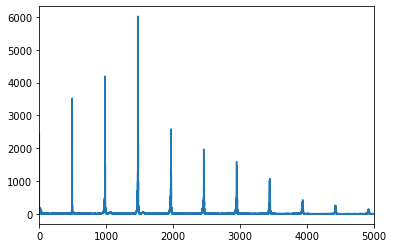

Writing sound.wav


clarinet-b4.wav


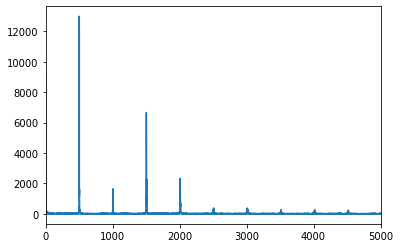

Writing sound.wav


In [ ]:
import sys
sys.path.insert(0, 'ThinkDSP/code/')
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

wave_file_names = ['trumpet-b4.wav', 'clarinet-b4.wav']

for wave_file in wave_file_names:

  # Read in audio file
  print(wave_file)
  wave = thinkdsp.read_wave(wave_file)

  # Plot spectrum of audio file
  spectrum = wave.make_spectrum()
  spectrum.plot()
  pyplot.xlim(0,5000)
  pyplot.show()

  # Play audio file
  wave.play()
  w1 = IPython.display.Audio(wave_file)
  display(w1)


#<font color='red'>Now the fun begins!

<font color='red'> Play each of the files above and review their spectrum graphs. What do you notice about the spectrum graphs? What is **similar** between graphs of the same note? What is **different** because of the instrument? How do these similarities and differences relate to similarities and differences in the sound?

# <font color='red'> Can we go the other way?

<font color='red'>Now let's see if we can take this spectrum information to **create** a sound. The `thinkdsp` library can generate sounds electronically if we provide a **signal**. Creating a signal requires 3 steps:

<font color='red'> 1. Create a signal for each frequency represented in the sound. Your spectrum graphs above indicate the frequencies (on the horizontal axis) and amplitudes (on the vertical axis) present in your recording. We can create these frequencies using a function called `thinkdsp.SinSignal`, which creates a sine wave with a frequency of `freq` and an amplitude of `amp`. We need to **save** each of these signals using a name. The code cell below creates two signals and saves them as `s1` and `s2` (signal 1, signal 2). Choose one of your recordings you'd like to recreate with the computer. **Modify** the `freq` and `amp` values below to match the first two frequencies in this recording's spectrum graph. (We'll add more signals to represent the other frequencies soon!)

<font color='red'> 2. Create a wave that combines these signals. When you hear a note from an instrument, you hear the base frequency and overtones that produce the instrument's timbre, all as a single combined wave. We can combine your frequencies simply by adding the signals like numbers. The code combines `s1` and `s2` into `mix1`, and then creates a wave (an actual sound recording) using the `mix1.make_wave` command. You don't need to change anything in Step 2 **yet**.

<font color='red'> 3. Play the wave that you generated. The final two lines create a player that will play for us the sound file created by your mix of signals.

<font color='red'>After you've added your frequencies and amplitudes, run the code cell below and play your wave. In what ways does it sound similar to your recording? In what ways does it sound different?

In [ ]:
# 1. Create a wave for each frequency.
s1 = thinkdsp.SinSignal(freq=500, amp=0.5)
s2 = thinkdsp.SinSignal(freq=1000, amp=0.6)
# Copy-paste to create more signals!

# 2. Create the wave.
mix1 = s1+s2
wave1 = mix1.make_wave(duration=2, start=0, framerate=44100)

# 3. Play wave
wave1.play()
w1 = IPython.display.Audio('sound.wav')
display(w1)

Writing sound.wav


<font color='red'>Having two frequencies is a good start, but you're missing the **overtones** that create the instrument's timbre. In fact, hearing a single frequency is very unusual for humans, which is why it sounds weird! In Step 1 above, add more signals that match the frequencies and amplitudes in your recording's spectrum graph. Add just a couple at a time, run the code cell, and play the sound. You should also add code to create a spectrum graph, using the previous spectrum graph as an example. (You'll need to change the code to create a graph based on `wave1` instead of `wave`, but I think you can handle that by now!)

<font color='red'>Your goal is to get the computer-generated sound to match the recording as closely as possible. Adjust your `freq` and `amp` values as needed (You're eye-balling it, after all!), and write down a description of the changes you make and what you learn about overtones and timbre in the process.

<font color='red'>Then, once you've gotten the hang of it, repeat this whole process for another recording, using the code cell below.

<font color='red'> Discuss what it means for two different instruments to play the same note but "sound differently."